In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima_model import ARIMA 

In [7]:
!pip install pyproject.toml

In [8]:
data = pd.read_csv(r"E:\python\python\XAUUSD - Copy.csv")
data

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,7/4/2023 0:00,1921.07,1930.22,1920.34,1929.65,858,0.44
1,7/3/2023 0:00,1917.70,1930.50,1910.11,1921.17,347,0.18
2,7/2/2023 0:00,1920.30,1920.30,1917.50,1917.70,-260,-0.14
3,6/30/2023 0:00,1908.71,1922.61,1900.57,1919.20,1049,0.55
4,6/29/2023 0:00,1909.47,1913.00,1893.16,1908.76,-71,-0.04
...,...,...,...,...,...,...,...
617,7/8/2021 0:00,1803.29,1818.00,1793.90,1803.75,46,0.03
618,7/7/2021 0:00,1795.28,1809.50,1793.41,1803.22,794,0.44
619,7/6/2021 0:00,1790.85,1814.89,1789.89,1795.68,483,0.27
620,7/5/2021 0:00,1786.68,1794.00,1783.80,1791.15,447,0.25


<AxesSubplot:>

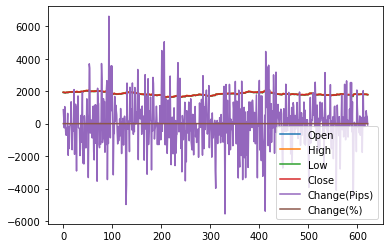

In [9]:
data.plot()

In [10]:
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Change(Pips)    0
Change(%)       0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          622 non-null    object 
 1   Open          622 non-null    float64
 2   High          622 non-null    float64
 3   Low           622 non-null    float64
 4   Close         622 non-null    float64
 5   Change(Pips)  622 non-null    int64  
 6   Change(%)     622 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 34.1+ KB


In [12]:
data.describe()

,Open,High,Low,Close,Change(Pips),Change(%)
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,1833.470354,1844.208939,1822.538248,1833.592749,12.239550,0.003617
std,94.417731,95.163303,93.223079,94.345885,1480.617616,0.804528
min,1627.270000,1640.760000,1615.040000,1626.890000,-5559.000000,-3.050000
25%,1775.080000,1787.085000,1765.435000,1774.957500,-704.000000,-0.380000
50%,1815.230000,1826.375000,1808.335000,1815.470000,11.500000,0.005000
75%,1913.792500,1924.717500,1896.670000,1914.700000,749.500000,0.410000
max,2052.780000,2071.320000,2030.770000,2051.930000,6612.000000,3.330000


In [13]:
dataset = pd.to_datetime(data.Date)

dataset = data['Open']
dataset.describe()

count     622.000000
mean     1833.470354
std        94.417731
min      1627.270000
25%      1775.080000
50%      1815.230000
75%      1913.792500
max      2052.780000
Name: Open, dtype: float64

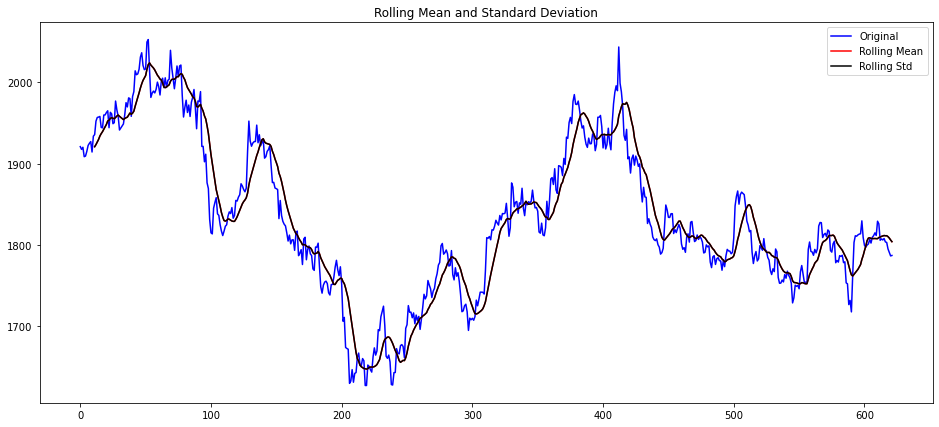

In [14]:
rollmean = dataset.rolling(12).mean()
rollstd = dataset.rolling(12).mean()

plt.figure(figsize=(16, 7))
fig = plt.figure(1)

#plot rolling statistics
orig = plt.plot(dataset, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

# Making Series Stationary

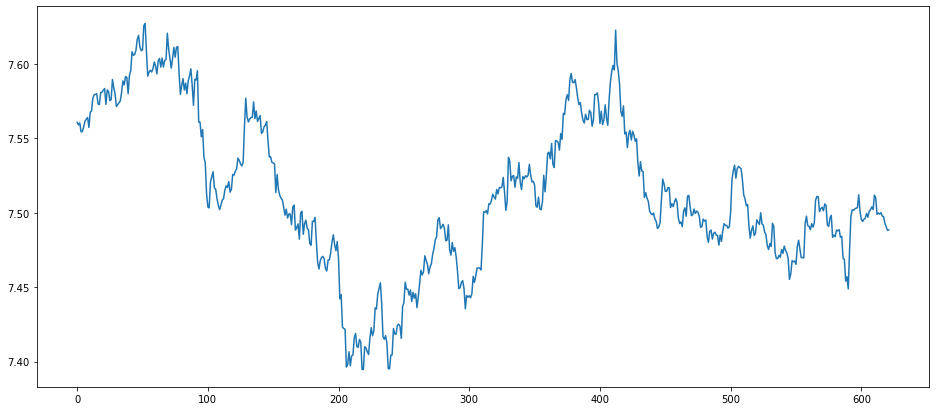

In [15]:
#lets try transformation
plt.figure(figsize=(16, 7))
fig = plt.figure(1)

ts_log = np.log(dataset)
plt.plot(ts_log)

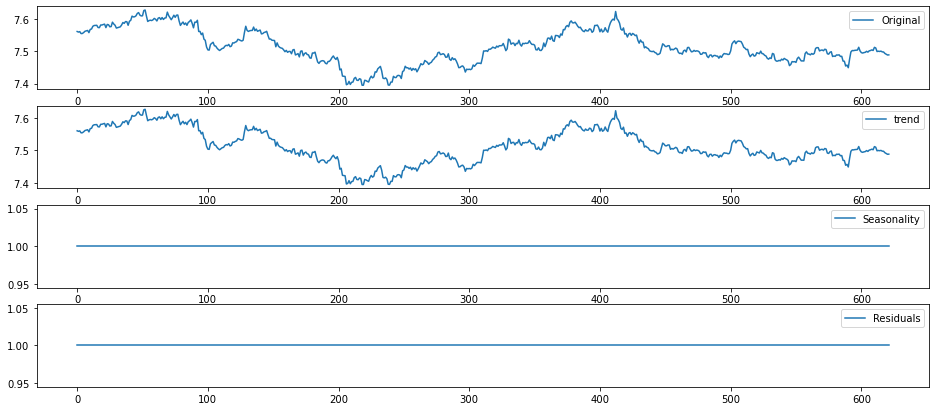

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log, period=1, model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16, 7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

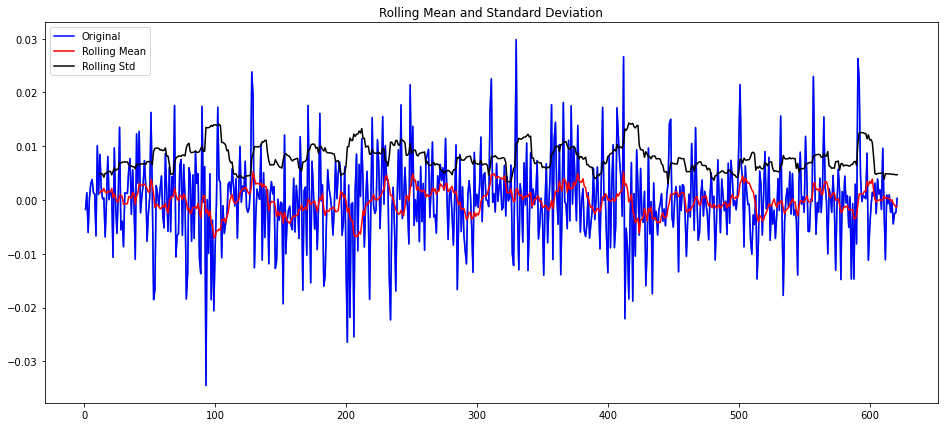

In [17]:
#lets try diffrencing
plt.figure(figsize=(16, 7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statstics
rollmean = ts_log_diff.rolling(12).mean()
rollstd = ts_log_diff.rolling(12).std()

#plot rolling statistics
orig = plt.plot(ts_log_diff, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

In [18]:
dataset.sort_index(inplace=True)

In [19]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

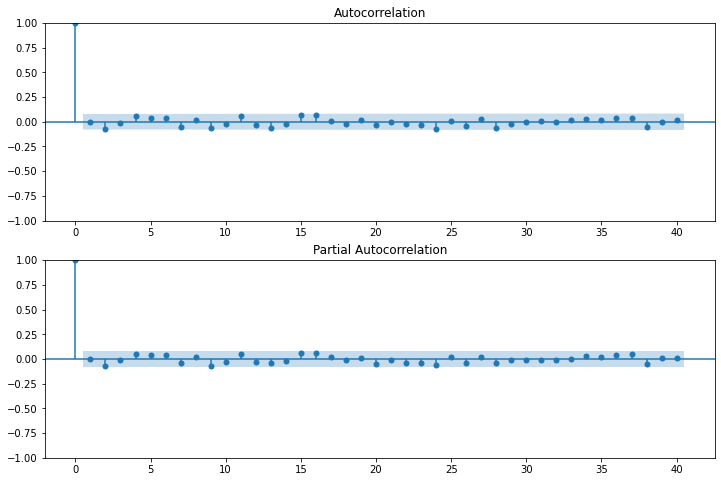

In [20]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot((211))
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(), lags=40, ax=ax2)

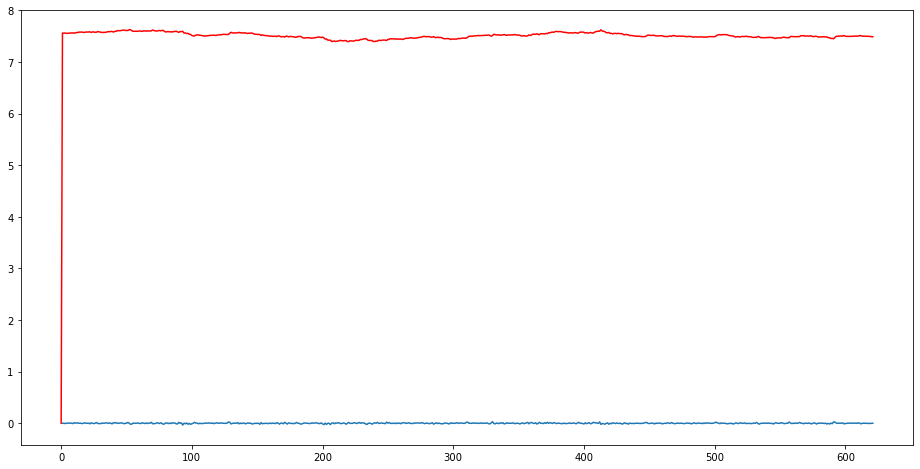

In [21]:
from statsmodels.tsa.arima.model import ARIMA
plt.figure(figsize=(16, 8))
model = ARIMA(ts_log, order=(2, 1, 2))
results_ARIMA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [23]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                  622
Model:                 ARIMA(2, 1, 2)   Log Likelihood                2116.822
Date:                Mon, 10 Jul 2023   AIC                          -4223.644
Time:                        20:52:35   BIC                          -4201.487
Sample:                             0   HQIC                         -4215.032
                                - 622                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2721      0.528      0.515      0.607      -0.764       1.308
ar.L2         -0.3211      0.447     -0.719      0.472      -1.196       0.554
ma.L1         -0.2784      0.536     -0.520      0.603      -1.328       0.772
ma.L2          0.2502      0.457      0.548      0.584      -0.645       1.145
sigma2      6.408e-05   2.86e-06     22.428      0.000    5.85e-05    6.97e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                59.64
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

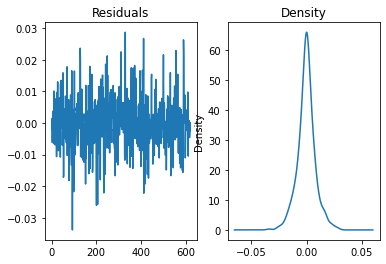

In [25]:
residuals = results_ARIMA.resid[1:]
fig, ax = plt.subplots(1, 2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show();

In [26]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

0    0.000000
1    7.560638
2    7.558890
3    7.560359
4    7.554156
dtype: float64


In [27]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

0     0.000000
1     7.560638
2    15.119528
3    22.679887
4    30.234043
dtype: float64


In [28]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum, fill_value=0)
ARIMA_log_prediction.head()

0     7.560638
1    15.121275
2    22.680165
3    30.240524
4    37.794680
dtype: float64

C:\Users\hamid\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'RMSE: inf')

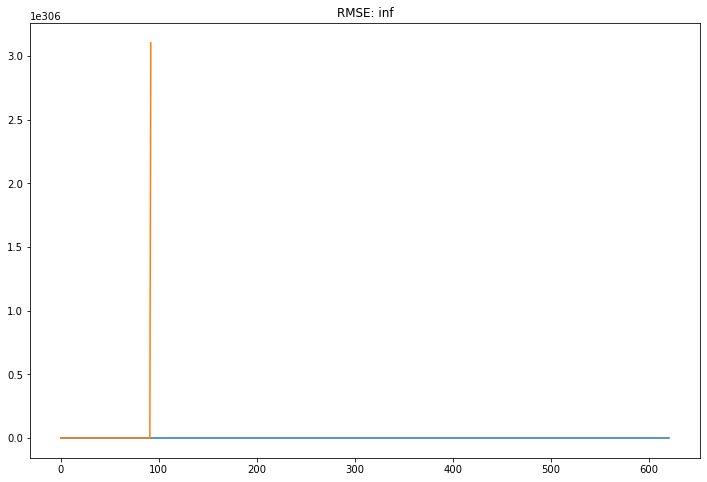

In [29]:
plt.figure(figsize=(12, 8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(dataset)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-dataset)**2)/len(dataset)))

In [30]:
results_ARIMA.predict(10, 20)

10    7.557221
11    7.567749
12    7.567724
13    7.576403
14    7.578590
15    7.579170
16    7.579859
17    7.573004
18    7.573100
19    7.580777
20    7.580072
Name: predicted_mean, dtype: float64

In [31]:
#!pip install pmdarima
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                             start_p=3,
                             start_q=3,
                             max_p=5,
                             max_q=5,
                             test="adf",
                             seasonal=True,
                             trace=True)
    return automodel

In [32]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-4221.159, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4225.281, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4223.294, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4223.296, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4227.151, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4221.549, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.001 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)